##Weather PCA

In [13]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('weather.csv')
print(data.head())

# Análisis exploratorio
print(data.describe())

     0    1    2    3    4     5     6     7     8    9   10   11  \
0 -3.9 -4.5 -2.3  1.2  5.4  10.9  15.5  15.3  11.6  6.9  3.4 -1.5   
1 -7.1 -7.5 -3.1  2.3  8.5  14.5  18.3  17.8  13.5  8.1  2.9 -3.9   
2 -6.0 -6.1 -1.6  3.3  9.2  14.8  18.2  18.1  13.8  8.6  3.4 -2.9   
3 -4.7 -5.9 -2.5  2.0  7.4  13.2  17.7  17.6  13.5  8.4  3.8 -1.8   
4 -2.7 -3.2  0.3  4.7  9.2  13.4  16.3  16.4  13.6  9.5  5.2 -0.3   

         station  
0     St. John’s  
1  Charlottetown  
2        Halifax  
3         Sydney  
4       Yarmouth  
               0          1          2         3          4          5  \
count  35.000000  35.000000  35.000000  35.00000  35.000000  35.000000   
mean  -14.171429 -11.842857  -6.942857   0.90000   7.974286  13.431429   
std     9.654672   9.236255   8.636015   7.08258   5.245578   4.050474   
min   -32.100000 -33.200000 -31.400000 -23.10000 -10.900000  -0.600000   
25%   -21.100000 -16.350000  -9.850000   0.40000   7.500000  12.900000   
50%   -12.100000 -10.800000

In [14]:
# Separar vairbales
stations = data.iloc[:, -1]
temperatures = data.iloc[:, :-1]


In [15]:
# Feature scalling (PCA es sensible a la escala)
scaler = StandardScaler()
temperatures_std = scaler.fit_transform(temperatures)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(temperatures_std)

# DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Station'] = stations

# Graficar las componentes principales como curvas
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

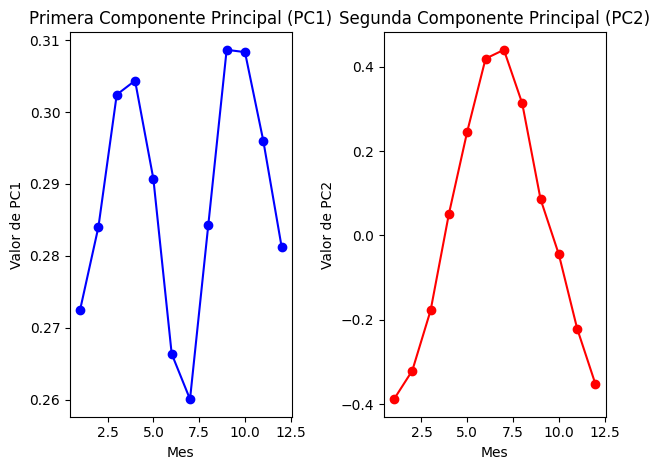

In [16]:
# Graficar la primera componente principal (PC1)
plt.subplot(1, 2, 1)
plt.plot(range(1, 13), pca.components_[0], marker='o', color='b')
plt.title('Primera Componente Principal (PC1)')
plt.xlabel('Mes')
plt.ylabel('Valor de PC1')

# Graficar la segunda componente principal (PC2)
plt.subplot(1, 2, 2)
plt.plot(range(1, 13), pca.components_[1], marker='o', color='r')
plt.title('Segunda Componente Principal (PC2)')
plt.xlabel('Mes')
plt.ylabel('Valor de PC2')

plt.tight_layout()
plt.show()


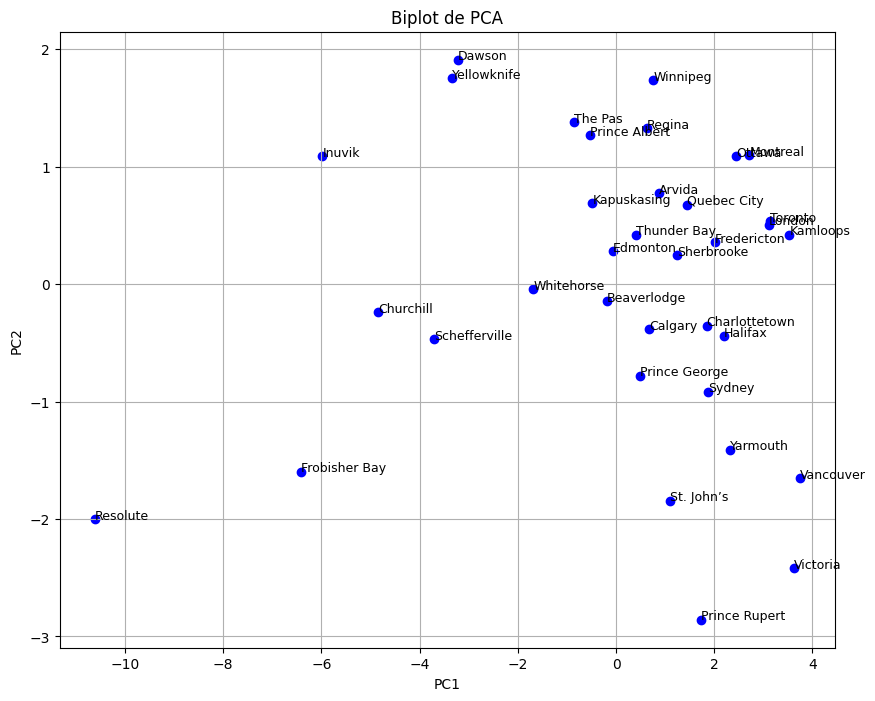

In [17]:
# Graficar el biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    xs = score[:, 0]  # PC1
    ys = score[:, 1]  # PC2
    n = coeff.shape[0]  # Número de variables (meses)

    # Graficar las estaciones
    plt.scatter(xs, ys, c='blue')  # Puntos para cada estación

    # Añadir etiquetas de las estaciones
    for i, station in enumerate(labels):
        plt.text(xs[i], ys[i], station, fontsize=9)  # Corregido el cierre de paréntesis

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot de PCA')
    plt.grid()
    plt.show()  # Se agrega para asegurarse de que la figura se muestre correctamente

# Llamar a la función biplot
biplot(principal_components, pca.components_.T, labels=stations)


##MDS a crimenes en EEUU

In [18]:
from sklearn.manifold import MDS

with open("crimes.dat", "r") as file:
    for line in file:
        print(line.strip())

Crime, No., 1, 2, 3, 4, 5, 6, 7
Murder,     1, 1.00, 0.52, 0.34, 0.81, 0.28, 0.06, 0.11
Rape,       2, 0.52, 1.00, 0.55, 0.70, 0.68, 0.60, 0.44
Robbery,    3, 0.34, 0.55, 1.00, 0.56, 0.62, 0.44, 0.62
Assault,    4, 0.81, 0.70, 0.56, 1.00, 0.52, 0.32, 0.33
Burglary,   5, 0.28, 0.68, 0.62, 0.52, 1.00, 0.80, 0.70
Larceny,    6, 0.06, 0.60, 0.44, 0.32, 0.80, 1.00, 0.55
Auto theft, 7, 0.11, 0.44, 0.62, 0.33, 0.70, 0.55, 1.00


In [19]:
with open("crimes.dat", "r") as file:
    lines = file.readlines()

# Extraer los nombres de los delitos y las correlaciones
delitos = []
correlation_matrix = []

for line in lines[1:]:  # Saltar la primera línea (encabezado)
    parts = line.strip().split(',')
    delitos.append(parts[0].strip())  # Nombre del delito
    correlation_matrix.append([float(x) for x in parts[2:]])  # Correlaciones


In [20]:
# Convertir a un DataFrame de pandas
correlation_matrix = pd.DataFrame(correlation_matrix, index=delitos, columns=delitos)
print("Matriz de correlaciones:")
print(correlation_matrix)

# Convertir la matriz de correlaciones a una matriz de distancias
# La distancia se define como d(xi, xj) = 1 - correlación(xi, xj)
distance_matrix = 1 - correlation_matrix
print("\nMatriz de distancias:")
print(distance_matrix)

Matriz de correlaciones:
            Murder  Rape  Robbery  Assault  Burglary  Larceny  Auto theft
Murder        1.00  0.52     0.34     0.81      0.28     0.06        0.11
Rape          0.52  1.00     0.55     0.70      0.68     0.60        0.44
Robbery       0.34  0.55     1.00     0.56      0.62     0.44        0.62
Assault       0.81  0.70     0.56     1.00      0.52     0.32        0.33
Burglary      0.28  0.68     0.62     0.52      1.00     0.80        0.70
Larceny       0.06  0.60     0.44     0.32      0.80     1.00        0.55
Auto theft    0.11  0.44     0.62     0.33      0.70     0.55        1.00

Matriz de distancias:
            Murder  Rape  Robbery  Assault  Burglary  Larceny  Auto theft
Murder        0.00  0.48     0.66     0.19      0.72     0.94        0.89
Rape          0.48  0.00     0.45     0.30      0.32     0.40        0.56
Robbery       0.66  0.45     0.00     0.44      0.38     0.56        0.38
Assault       0.19  0.30     0.44     0.00      0.48     0.68   

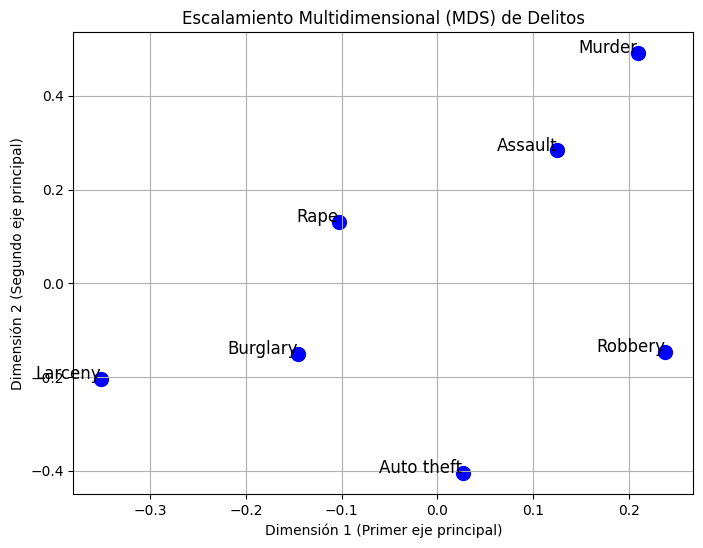

In [21]:
# Aplicar escalamiento multidimensional (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(distance_matrix)

# Crear un DataFrame con los resultados del MDS
mds_df = pd.DataFrame(data=mds_results, columns=['Dimensión 1', 'Dimensión 2'])
mds_df['Delito'] = delitos  # Añadir los nombres de los delitos

# Graficar los resultados del MDS
plt.figure(figsize=(8, 6))
plt.scatter(mds_results[:, 0], mds_results[:, 1], c='blue', s=100)

# Añadir etiquetas de los delitos
for i, delito in enumerate(mds_df['Delito']):
    plt.text(mds_results[i, 0], mds_results[i, 1], delito, fontsize=12, ha='right')

plt.title('Escalamiento Multidimensional (MDS) de Delitos')
plt.xlabel('Dimensión 1 (Primer eje principal)')
plt.ylabel('Dimensión 2 (Segundo eje principal)')
plt.grid()
plt.show()


##Imagen PCA

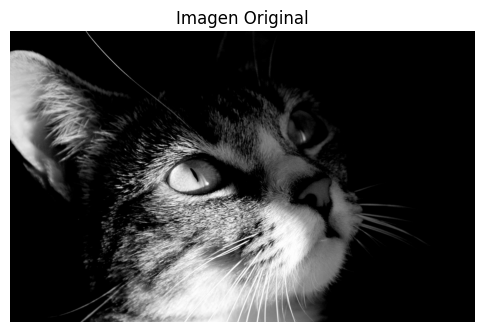

In [23]:
from sklearn.decomposition import PCA
from skimage import io, color

image = io.imread('gato.jpg')

if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Parámetros
C = 8
k_values = [1, 5, 10, 20, 50]  # Valores de k

In [24]:
# Función para dividir la imagen en bloques y aplicar PCA
def compress_image(image, C, k):
    # Obtener dimensiones de la imagen
    H, W = image.shape

    # Dividir la imagen en bloques de C x C
    blocks = []
    for i in range(0, H, C):
        for j in range(0, W, C):
            block = image[i:i+C, j:j+C]
            if block.shape == (C, C):  # Asegurarse de que el bloque tenga el tamaño correcto
                blocks.append(block.flatten())  # Convertir el bloque en un vector

    # Convertir la lista de bloques en una matriz de datos
    X = np.array(blocks)

    # Aplicar PCA
    pca = PCA(n_components=k)
    X_compressed = pca.fit_transform(X)  # Proyectar los datos en k componentes principales

    # Reconstruir los bloques
    X_reconstructed = pca.inverse_transform(X_compressed)

    # Reconstruir la imagen
    reconstructed_image = np.zeros_like(image)
    index = 0
    for i in range(0, H, C):
        for j in range(0, W, C):
            if i+C <= H and j+C <= W:
                block = X_reconstructed[index].reshape(C, C)
                reconstructed_image[i:i+C, j:j+C] = block
                index += 1

    return reconstructed_image

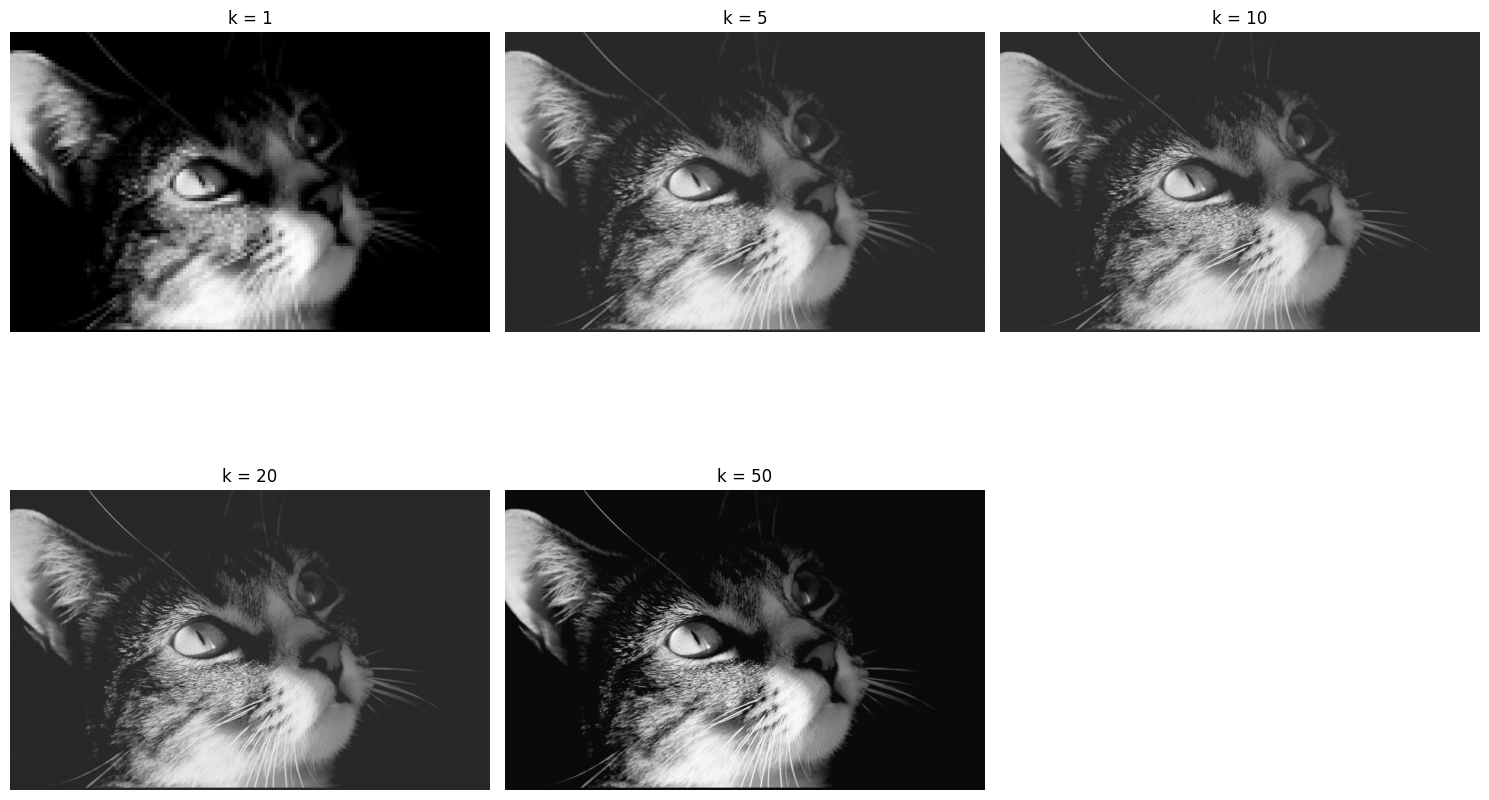

In [25]:
# Probar diferentes valores de k y mostrar los resultados
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Comprimir y reconstruir la imagen
    reconstructed_image = compress_image(image, C, k)

    # Mostrar la imagen reconstruida
    plt.subplot(2, 3, i+1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [26]:
# Calcular el error de reconstrucción para cada k
def reconstruction_error(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

# Mostrar el error de reconstrucción para cada k
print("Error de reconstrucción para diferentes valores de k:")
for k in k_values:
    reconstructed_image = compress_image(image, C, k)
    error = reconstruction_error(image, reconstructed_image)
    print(f"k = {k}: Error = {error:.4f}")

Error de reconstrucción para diferentes valores de k:
k = 1: Error = 0.0055
k = 5: Error = 0.0031
k = 10: Error = 0.0023
k = 20: Error = 0.0018
k = 50: Error = 0.0016



##NNMF sistemas de recomendacion


In [27]:
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

print("Películas:")
print(movies.head())

print("\nCalificaciones:")
print(ratings.head())


Películas:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Calificaciones:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [28]:
# Crear la matriz usuario-película
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Rellenar valores faltantes con 0 (usuarios que no calificaron una película)
user_movie_matrix = user_movie_matrix.fillna(0)

# Mostrar la matriz usuario-película
print("\nMatriz usuario-película:")
print(user_movie_matrix.head())

# Aplicar Factorización No Negativa de Matrices (NNMF)
n_components = 20
model = NMF(n_components=n_components, init='random', random_state=42)
W = model.fit_transform(user_movie_matrix)
H = model.components_



Matriz usuario-película:
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0    

In [29]:
def recommend_movies(user_id, top_n=10):
    # Obtener las predicciones de calificaciones para el usuario
    user_ratings = W[user_id - 1] @ H  # user_id - 1 porque los índices en Python comienzan en 0

    # Obtener las películas que el usuario no ha calificado
    unrated_movies = user_movie_matrix.loc[user_id] == 0
    unrated_movies = unrated_movies[unrated_movies].index

    # Predecir las calificaciones para las películas no calificadas
    predicted_ratings = pd.Series(user_ratings, index=user_movie_matrix.columns)
    predicted_ratings = predicted_ratings[unrated_movies]

    # Ordenar las películas por la calificación predicha
    top_movies = predicted_ratings.sort_values(ascending=False).head(top_n)

    # Obtener los títulos de las películas recomendadas
    top_movies = pd.DataFrame(top_movies).reset_index()
    top_movies = top_movies.merge(movies, on='movieId')

    return top_movies[['movieId', 'title', 'genres']]

In [30]:
def top_rated_movies(user_id, top_n=10):
    # Obtener las películas mejor calificadas por el usuario
    user_ratings = ratings[ratings['userId'] == user_id]
    top_movies = user_ratings.sort_values(by='rating', ascending=False).head(top_n)

    # Obtener los títulos de las películas
    top_movies = top_movies.merge(movies, on='movieId')

    return top_movies[['movieId', 'title', 'genres', 'rating']]

# Ejemplo: Recomendar películas para 3 usuarios
user_ids = [1, 2, 3]  # IDs de usuarios para los que se harán recomendaciones

for user_id in user_ids:
    print(f"\nRecomendaciones para el usuario {user_id}:")
    recommendations = recommend_movies(user_id, top_n=5)
    print(recommendations)

    print(f"\nPelículas mejor calificadas por el usuario {user_id}:")
    top_movies = top_rated_movies(user_id, top_n=5)
    print(top_movies)


Recomendaciones para el usuario 1:
   movieId                                   title  \
0      589       Terminator 2: Judgment Day (1991)   
1     1200                           Aliens (1986)   
2     2762                 Sixth Sense, The (1999)   
3     1374  Star Trek II: The Wrath of Khan (1982)   
4     1036                         Die Hard (1988)   

                             genres  
0                     Action|Sci-Fi  
1    Action|Adventure|Horror|Sci-Fi  
2              Drama|Horror|Mystery  
3  Action|Adventure|Sci-Fi|Thriller  
4             Action|Crime|Thriller  

Películas mejor calificadas por el usuario 1:
   movieId                                      title  \
0     5060               M*A*S*H (a.k.a. MASH) (1970)   
1     2872                           Excalibur (1981)   
2     1291  Indiana Jones and the Last Crusade (1989)   
3     1298                Pink Floyd: The Wall (1982)   
4     2948               From Russia with Love (1963)   

                     